In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score


In [3]:
data = pd.read_csv("synthetic_spam_dataset_extended.csv")

In [4]:
data.size

5000

In [5]:
data.shape

(1000, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   word_freq_free   1000 non-null   float64
 1   word_freq_money  1000 non-null   float64
 2   word_freq_offer  1000 non-null   float64
 3   email_length     1000 non-null   int64  
 4   spam             1000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 39.2 KB


In [7]:
data.describe()

,word_freq_free,word_freq_money,word_freq_offer,email_length,spam
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.421240,2.313840,2.556100,274.503000,0.849000
std,1.506579,1.429513,1.459374,129.532895,0.358228
min,0.030000,0.030000,0.070000,61.000000,0.000000
25%,0.990000,1.140000,1.400000,154.000000,1.000000
50%,2.360000,2.140000,2.660000,266.000000,1.000000
75%,3.850000,3.450000,3.790000,410.000000,1.000000
max,4.930000,4.930000,4.950000,494.000000,1.000000


In [8]:
data.isnull().sum()

word_freq_free     0
word_freq_money    0
word_freq_offer    0
email_length       0
spam               0
dtype: int64

In [9]:
data.duplicated().sum()

np.int64(880)

In [10]:
data.isnull().sum()

word_freq_free     0
word_freq_money    0
word_freq_offer    0
email_length       0
spam               0
dtype: int64

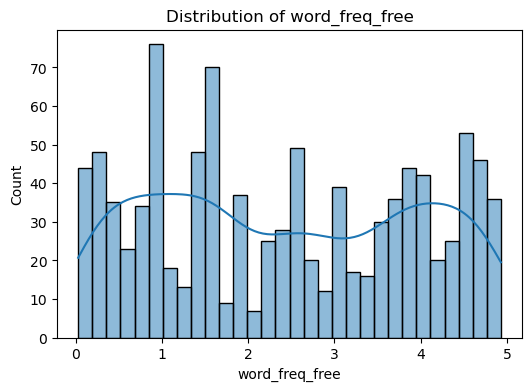

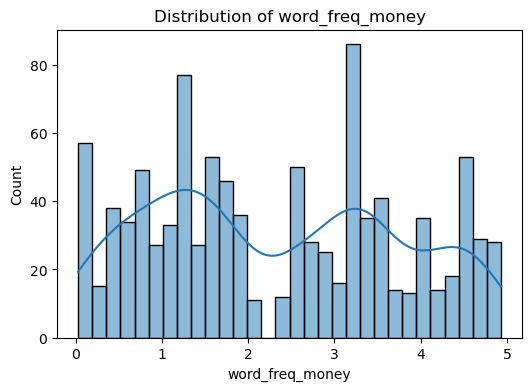

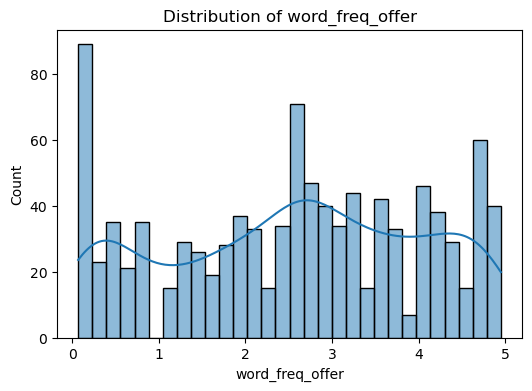

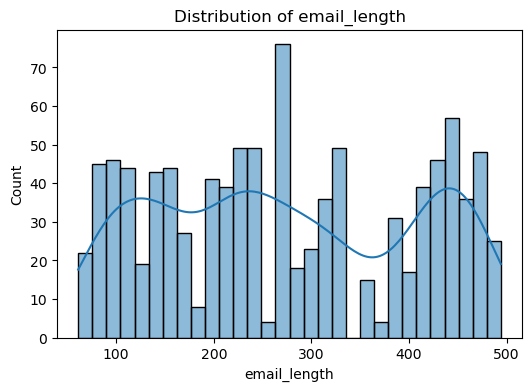

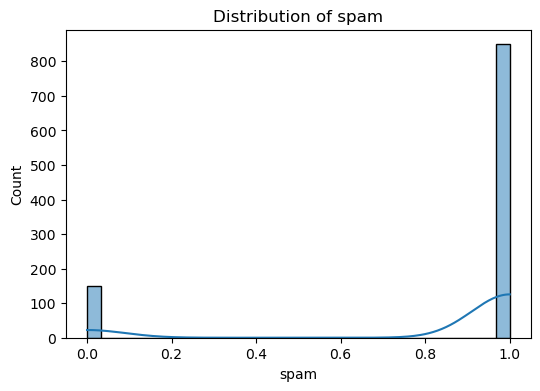

In [ ]:
for col in data.select_dtypes(include=['int64','float64']).columns:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()


In [ ]:
print("Data types:\n", data.dtypes)

Data types:
 word_freq_free     float64
word_freq_money    float64
word_freq_offer    float64
email_length         int64
spam                 int64
dtype: object


In [ ]:
X = data[['word_freq_free', 'word_freq_money', 'word_freq_offer', 'email_length']]
y = data['spam']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.885

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.47      0.55        30
           1       0.91      0.96      0.93       170

    accuracy                           0.89       200
   macro avg       0.79      0.71      0.74       200
weighted avg       0.87      0.89      0.88       200



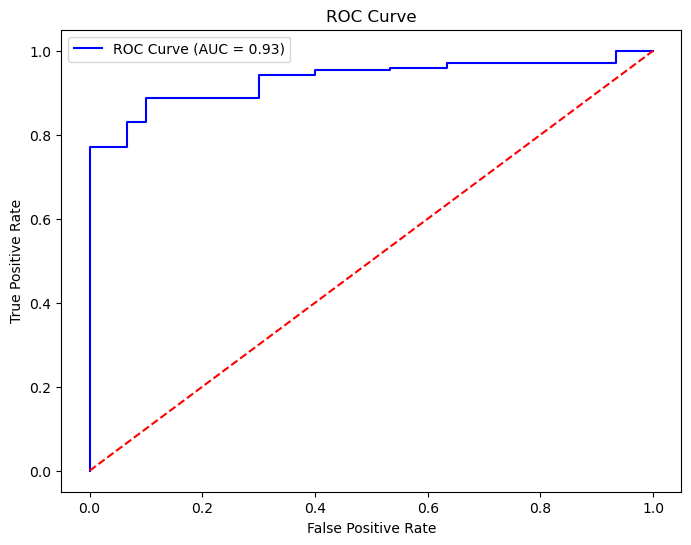

In [ ]:
y_prob = nb.predict_proba(X_test)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
sample_email = pd.DataFrame([[0.5, 0.2, 0.1, 300]], columns=['word_freq_free', 'word_freq_money', 'word_freq_offer', 'email_length'])
sample_pred_class = nb.predict(sample_email)[0]
sample_pred_prob = nb.predict_proba(sample_email)[0]

print(f"Predicted Class: {sample_pred_class}")
print(f"Predicted Probabilities: {sample_pred_prob}")

Predicted Class: 0
Predicted Probabilities: [0.83557431 0.16442569]
